In [1]:
import os
import seaborn as sns
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('BlackFriday.csv')
print(data.shape)
data.head()

(537577, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Correlation analysis

#### 1. Purchase and other numeric features

Gender is categorical, but we can convert the column into binary form

In [3]:
data1 = data
data1['GenderInt'] = (data1['Gender'] == 'F').astype(int)
data1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,GenderInt
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,0


In [4]:
numeric_features = data1.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
GenderInt               int32
dtype: object

In [5]:
#Purchase 와 나머지 feature 간의 correlation
corr = numeric_features.corr(method = 'pearson')
print (corr['Purchase'].sort_values(ascending=False)[:10],'\n')

Purchase              1.000000
Occupation            0.021104
User_ID               0.005389
Marital_Status        0.000129
Product_Category_3   -0.022257
GenderInt            -0.060086
Product_Category_2   -0.209973
Product_Category_1   -0.314125
Name: Purchase, dtype: float64 



Occupation has the biggest correlation value with 'purchase', but still the correlation value is low. There does not seem to be any predictor that would have a high impact on Purchase. 

How about converting age-group into numeric values?

In [6]:
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data2 = data1
data2["AgeInt"] = data1["Age"].apply(lambda line: age_dict[line])


In [7]:
data2[["User_ID", "Age", "AgeInt"]].head()

,User_ID,Age,AgeInt
0,1000001,0-17,0
1,1000001,0-17,0
2,1000001,0-17,0
3,1000001,0-17,0
4,1000002,55+,6


Column "AgeInt" has numerical values. The table below is the correlation between 'purchase' and other numerical values including 'AgeInt'

In [8]:
#Purchase 와 나머지 feature 간의 correlation - Age 에 대해서 추가
numeric_features = data2.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['Purchase'].sort_values(ascending=False)[:10],'\n')

Purchase              1.000000
Occupation            0.021104
AgeInt                0.017717
User_ID               0.005389
Marital_Status        0.000129
Product_Category_3   -0.022257
GenderInt            -0.060086
Product_Category_2   -0.209973
Product_Category_1   -0.314125
Name: Purchase, dtype: float64 



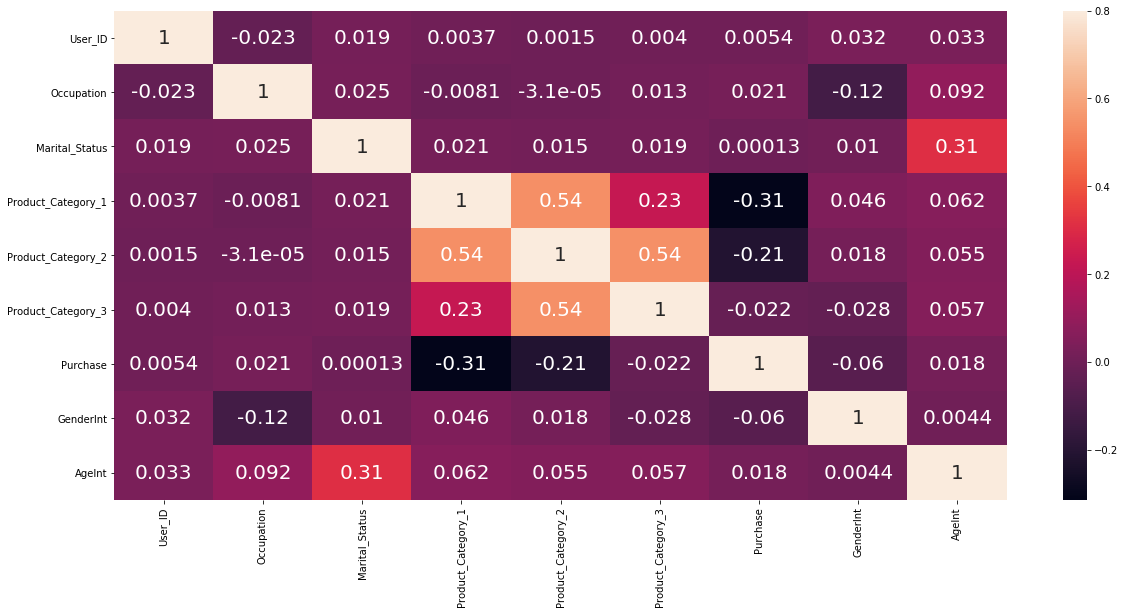

In [9]:
corrmat = data2.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8,annot_kws={'size': 20}, annot=True) 

Correlation value between Product_catgory 1, 2 and 3 is high. So, we'll just deal with the Product_category 1 in correlation analysis.

#### 2. Product_Category and other features

Just use the 'Product_Category_1' feature

In [10]:
del_columns = ['Product_Category_2', 'Product_Category_3']
data2.drop(del_columns, inplace=True, axis=1)
data2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,GenderInt,AgeInt
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,1,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,1,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,0,6


In [11]:
numeric_features = data2.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['Product_Category_1'].sort_values(ascending=False)[:10],'\n')

Product_Category_1    1.000000
AgeInt                0.061951
GenderInt             0.045661
Marital_Status        0.020546
User_ID               0.003687
Occupation           -0.008114
Purchase             -0.314125
Name: Product_Category_1, dtype: float64 



Convert City_Category into numeric values

In [12]:
data2.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      17959
GenderInt                         2
AgeInt                            7
dtype: int64

In [13]:
#City_Category 에는 A, B, C 값이 있음.
# Giving City_Category Numerical values
city_dict = {'A':0, 'B':1, 'C':2 }
data2["City_Category"] = data2["City_Category"].apply(lambda line: city_dict[line])
data2[["User_ID", "City_Category"]].head()


,User_ID,City_Category
0,1000001,0
1,1000001,0
2,1000001,0
3,1000001,0
4,1000002,2


Convert Stay_In_Current_City_Years into numerical vals

In [31]:
#Number of times each value appears in the column
frequency = data2['Stay_In_Current_City_Years'].value_counts()
print("Frequency distribution for Stay_In_Current_City_Years\n")
print(frequency)

Frequency distribution for Stay_In_Current_City_Years

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64


In [14]:
# Giving City_Category Numerical values
# Convert 4+ into 4
city_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4 }
data2["Stay_In_Current_City_Years"] = data2["Stay_In_Current_City_Years"].apply(lambda line: city_dict[line])
data2[["User_ID", "Stay_In_Current_City_Years"]].head()

,User_ID,Stay_In_Current_City_Years
0,1000001,2
1,1000001,2
2,1000001,2
3,1000001,2
4,1000002,4


In [15]:
numeric_features = data2.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['Product_Category_1'].sort_values(ascending=False)[:10],'\n')

Product_Category_1            1.000000
AgeInt                        0.061951
GenderInt                     0.045661
Marital_Status                0.020546
User_ID                       0.003687
Stay_In_Current_City_Years   -0.004182
Occupation                   -0.008114
City_Category                -0.027444
Purchase                     -0.314125
Name: Product_Category_1, dtype: float64 



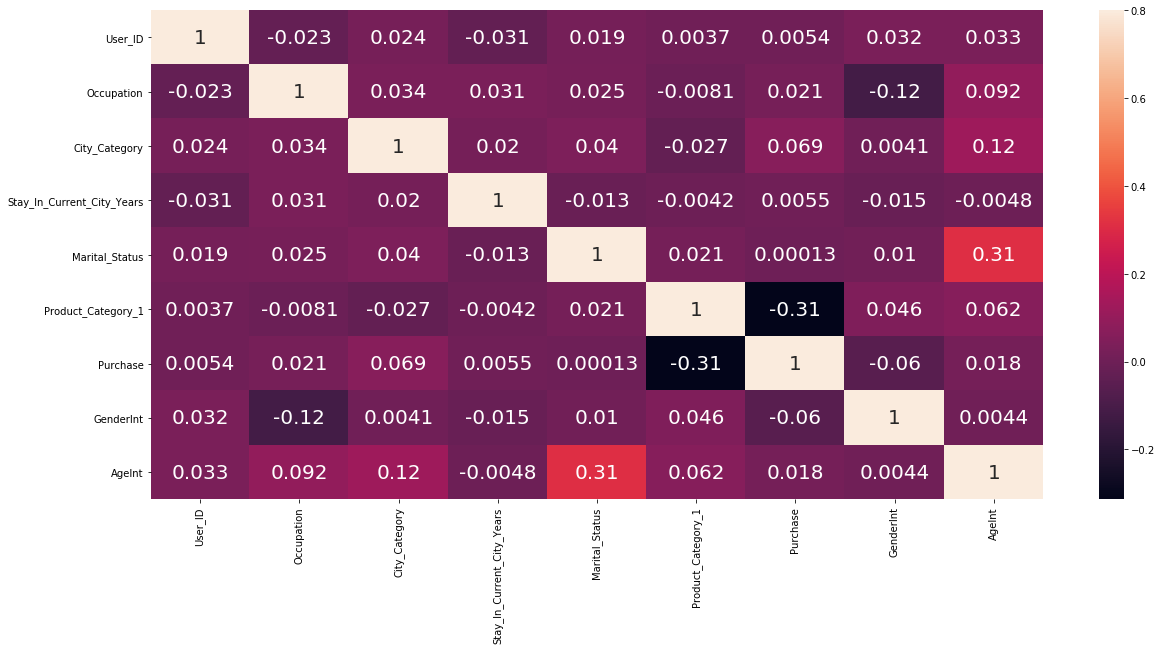

In [16]:
# 다시 전체에 대해서 pearson correlation 을 구해보겠다.
corrmat = data2.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8,annot_kws={'size': 20}, annot=True) 

#### 3. Significance of correlation

Even small correlations become significant with large-enough sample sizes

In [45]:
#instead of Numpy, can we use here Numpy and Scipy both library 
#to get the addition p value or in the existing  script can we add this function
#to obtain the p Value as a raster

from scipy.stats import pearsonr

column = {"Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status", "Product_Category_1", "Purchase", "GenderInt", "AgeInt"} 
print("**Pearson Correlation Coefficient and p-value between Purchase and other features")
print()
alpha = 0.05
for col in column :
    coef, p_val = pearsonr(data2["Purchase"], data2[col])
    print("<"+ col + ">")
    print("Pearson Correlation Coefficient: %.3f" % coef)
    print("p-value: %.3f" % p_val)
    
    if p_val > alpha:
        print('-> uncorrelated (fail to reject H0)')
    else: 
         print('-> correlated (reject H0)')
    print()

**Pearson Correlation Coefficient and p-value between Purchase and other features

<GenderInt>
Pearson Correlation Coefficient: -0.060
p-value: 0.000
-> correlated (reject H0)

<Product_Category_1>
Pearson Correlation Coefficient: -0.314
p-value: 0.000
-> correlated (reject H0)

<City_Category>
Pearson Correlation Coefficient: 0.069
p-value: 0.000
-> correlated (reject H0)

<AgeInt>
Pearson Correlation Coefficient: 0.018
p-value: 0.000
-> correlated (reject H0)

<Purchase>
Pearson Correlation Coefficient: 1.000
p-value: 0.000
-> correlated (reject H0)

<Stay_In_Current_City_Years>
Pearson Correlation Coefficient: 0.005
p-value: 0.000
-> correlated (reject H0)

<Marital_Status>
Pearson Correlation Coefficient: 0.000
p-value: 0.925
-> uncorrelated (fail to reject H0)

<Occupation>
Pearson Correlation Coefficient: 0.021
p-value: 0.000
-> correlated (reject H0)



#### 4. Spearman correlation analysis between purchase and other values

Spearman correlation between purchase and other values

In [20]:
#calculate the spearman's correlation between two variables
from scipy.stats import spearmanr
#ageint, stay_in_current_city_years
coef, p = spearmanr(data2["Purchase"], data2["AgeInt"])
print("Spearman's correlation coefficient between purchase and ageint: %.3f\n" % coef)
coef, p = spearmanr(data2["Purchase"], data2["Stay_In_Current_City_Years"])
print("Spearman's correlation coefficient between purchase and stay_in_current_city_years: %.3f" % coef)

Spearman's correlation coefficient between purchase and ageint: 0.022

Spearman's correlation coefficient between purchase and stay_in_current_city_years: 0.006


Get the sum of purchase of each user and then get the spearman correlation

#### Occupation

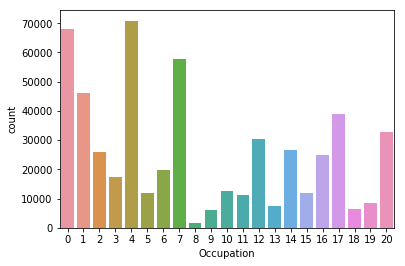

In [20]:
sns.countplot(data.Occupation)